<a href="https://colab.research.google.com/github/Saiteja173/Etherium-Fraud-Detection/blob/main/EtheriumKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [131]:
df = pd.read_csv('transaction_dataset.csv')
df.columns = [x.lower() for x in df.columns]

In [132]:
df.head()

,unnamed: 0,index,address,flag,avg min between sent tnx,avg min between received tnx,time diff between first and last (mins),sent tnx,received tnx,number of created contracts,unique received from addresses,unique sent to addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total ether sent,total ether received,total ether sent contracts,total ether balance,total erc20 tnxs,erc20 total ether received,erc20 total ether sent,erc20 total ether sent contract,erc20 uniq sent addr,erc20 uniq rec addr,erc20 uniq sent addr.1,erc20 uniq rec contract addr,erc20 avg time between sent tnx,erc20 avg time between rec tnx,erc20 avg time between rec 2 tnx,erc20 avg time between contract tnx,erc20 min val rec,erc20 max val rec,erc20 avg val rec,erc20 min val sent,erc20 max val sent,erc20 avg val sent,erc20 min val sent contract,erc20 max val sent contract,erc20 avg val sent contract,erc20 uniq sent token name,erc20 uniq rec token name,erc20 most sent token type,erc20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [133]:
df=df.drop('unnamed: 0',axis=1)
df=df.drop('index',axis=1)

In [134]:
np.unique(df[' erc20 most sent token type'].astype(str))
np.unique(df[' erc20_most_rec_token_type'].astype(str))

df.drop(columns=[' erc20 most sent token type', ' erc20_most_rec_token_type'], inplace=True)

In [135]:
df.shape

(9841, 47)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 47 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   address                                               9841 non-null   object 
 1   flag                                                  9841 non-null   int64  
 2   avg min between sent tnx                              9841 non-null   float64
 3   avg min between received tnx                          9841 non-null   float64
 4   time diff between first and last (mins)               9841 non-null   float64
 5   sent tnx                                              9841 non-null   int64  
 6   received tnx                                          9841 non-null   int64  
 7   number of created contracts                           9841 non-null   int64  
 8   unique received from addresses                        9841

In [137]:
df.describe()

,flag,avg min between sent tnx,avg min between received tnx,time diff between first and last (mins),sent tnx,received tnx,number of created contracts,unique received from addresses,unique sent to addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total ether sent,total ether received,total ether sent contracts,total ether balance,total erc20 tnxs,erc20 total ether received,erc20 total ether sent,erc20 total ether sent contract,erc20 uniq sent addr,erc20 uniq rec addr,erc20 uniq sent addr.1,erc20 uniq rec contract addr,erc20 avg time between sent tnx,erc20 avg time between rec tnx,erc20 avg time between rec 2 tnx,erc20 avg time between contract tnx,erc20 min val rec,erc20 max val rec,erc20 avg val rec,erc20 min val sent,erc20 max val sent,erc20 avg val sent,erc20 min val sent contract,erc20 max val sent contract,erc20 avg val sent contract,erc20 uniq sent token name,erc20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,1.248680e+01,3.052963e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380,0.000

In [138]:
df.head()

,address,flag,avg min between sent tnx,avg min between received tnx,time diff between first and last (mins),sent tnx,received tnx,number of created contracts,unique received from addresses,unique sent to addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total ether sent,total ether received,total ether sent contracts,total ether balance,total erc20 tnxs,erc20 total ether received,erc20 total ether sent,erc20 total ether sent contract,erc20 uniq sent addr,erc20 uniq rec addr,erc20 uniq sent addr.1,erc20 uniq rec contract addr,erc20 avg time between sent tnx,erc20 avg time between rec tnx,erc20 avg time between rec 2 tnx,erc20 avg time between contract tnx,erc20 min val rec,erc20 max val rec,erc20 avg val rec,erc20 min val sent,erc20 max val sent,erc20 avg val sent,erc20 min val sent contract,erc20 max val sent contract,erc20 avg val sent contract,erc20 uniq sent token name,erc20 uniq rec token name
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0


In [139]:
unique_values = df.nunique()

In [140]:
unique_values

address                                                 9816
flag                                                       2
avg min between sent tnx                                5013
avg min between received tnx                            6223
time diff between first and last (mins)                 7810
sent tnx                                                 641
received tnx                                             727
number of created contracts                               20
unique received from addresses                           256
unique sent to addresses                                 258
min value received                                      4589
max value received                                      6302
avg val received                                        6767
min val sent                                            4719
max val sent                                            6647
avg val sent                                            5854
min value sent to contra

In [141]:
missing_values = df.isna()
missing_percent = missing_values.sum() / df.shape[0] * 100
missing_df = pd.DataFrame([missing_values.sum(), missing_percent], ['count', 'percent'])
display(missing_df.sort_values(by='percent', axis=1, ascending=False))
missing_df.sort_values(by='percent', axis=1, ascending=False).to_csv('missing.csv')

,erc20 uniq rec token name,erc20 avg time between contract tnx,erc20 total ether sent,erc20 total ether sent contract,erc20 uniq sent addr,erc20 uniq rec addr,erc20 uniq sent addr.1,erc20 uniq rec contract addr,erc20 avg time between sent tnx,erc20 avg time between rec tnx,erc20 avg time between rec 2 tnx,erc20 min val rec,total erc20 tnxs,erc20 max val rec,erc20 avg val rec,erc20 min val sent,erc20 max val sent,erc20 avg val sent,erc20 min val sent contract,erc20 max val sent contract,erc20 avg val sent contract,erc20 uniq sent token name,erc20 total ether received,address,flag,max value received,avg min between sent tnx,avg min between received tnx,time diff between first and last (mins),sent tnx,received tnx,number of created contracts,unique received from addresses,unique sent to addresses,min value received,avg val received,total ether sent contracts,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total ether sent,total ether received,total ether balance
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
df[df['flag']==1].isna()

,address,flag,avg min between sent tnx,avg min between received tnx,time diff between first and last (mins),sent tnx,received tnx,number of created contracts,unique received from addresses,unique sent to addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total ether sent,total ether received,total ether sent contracts,total ether balance,total erc20 tnxs,erc20 total ether received,erc20 total ether sent,erc20 total ether sent contract,erc20 uniq sent addr,erc20 uniq rec addr,erc20 uniq sent addr.1,erc20 uniq rec contract addr,erc20 avg time between sent tnx,erc20 avg time between rec tnx,erc20 avg time between rec 2 tnx,erc20 avg time between contract tnx,erc20 min val rec,erc20 max val rec,erc20 avg val rec,erc20 min val sent,erc20 max val sent,erc20 avg val sent,erc20 min val sent contract,erc20 max val sent contract,erc20 avg val sent contract,erc20 uniq sent token name,erc20 uniq rec token name
7662,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7663,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7664,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7665,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7666,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [143]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN['flag'])

7662    1
7666    1
7675    1
7676    1
7678    1
       ..
9831    1
9833    1
9834    1
9835    1
9839    1
Name: flag, Length: 829, dtype: int64


In [144]:
df[row_has_NaN]['flag'].nunique()

1

<function matplotlib.pyplot.show>

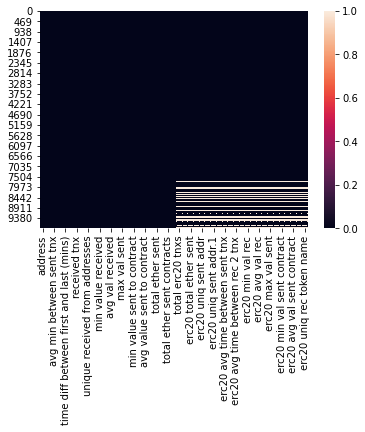

In [145]:
sns.heatmap(missing_values)
plt.show

In [146]:
non_fraud_rows, fraud_rows = np.where( [df.iloc[:,0]==1] )
print(df.iloc[fraud_rows,:].isna().sum()[-20:])

 erc20 total ether sent contract        0
 erc20 uniq sent addr                   0
 erc20 uniq rec addr                    0
 erc20 uniq sent addr.1                 0
 erc20 uniq rec contract addr           0
 erc20 avg time between sent tnx        0
 erc20 avg time between rec tnx         0
 erc20 avg time between rec 2 tnx       0
 erc20 avg time between contract tnx    0
 erc20 min val rec                      0
 erc20 max val rec                      0
 erc20 avg val rec                      0
 erc20 min val sent                     0
 erc20 max val sent                     0
 erc20 avg val sent                     0
 erc20 min val sent contract            0
 erc20 max val sent contract            0
 erc20 avg val sent contract            0
 erc20 uniq sent token name             0
 erc20 uniq rec token name              0
dtype: int64


In [147]:
missing_columns = df.columns[df.isna().sum() > 0]

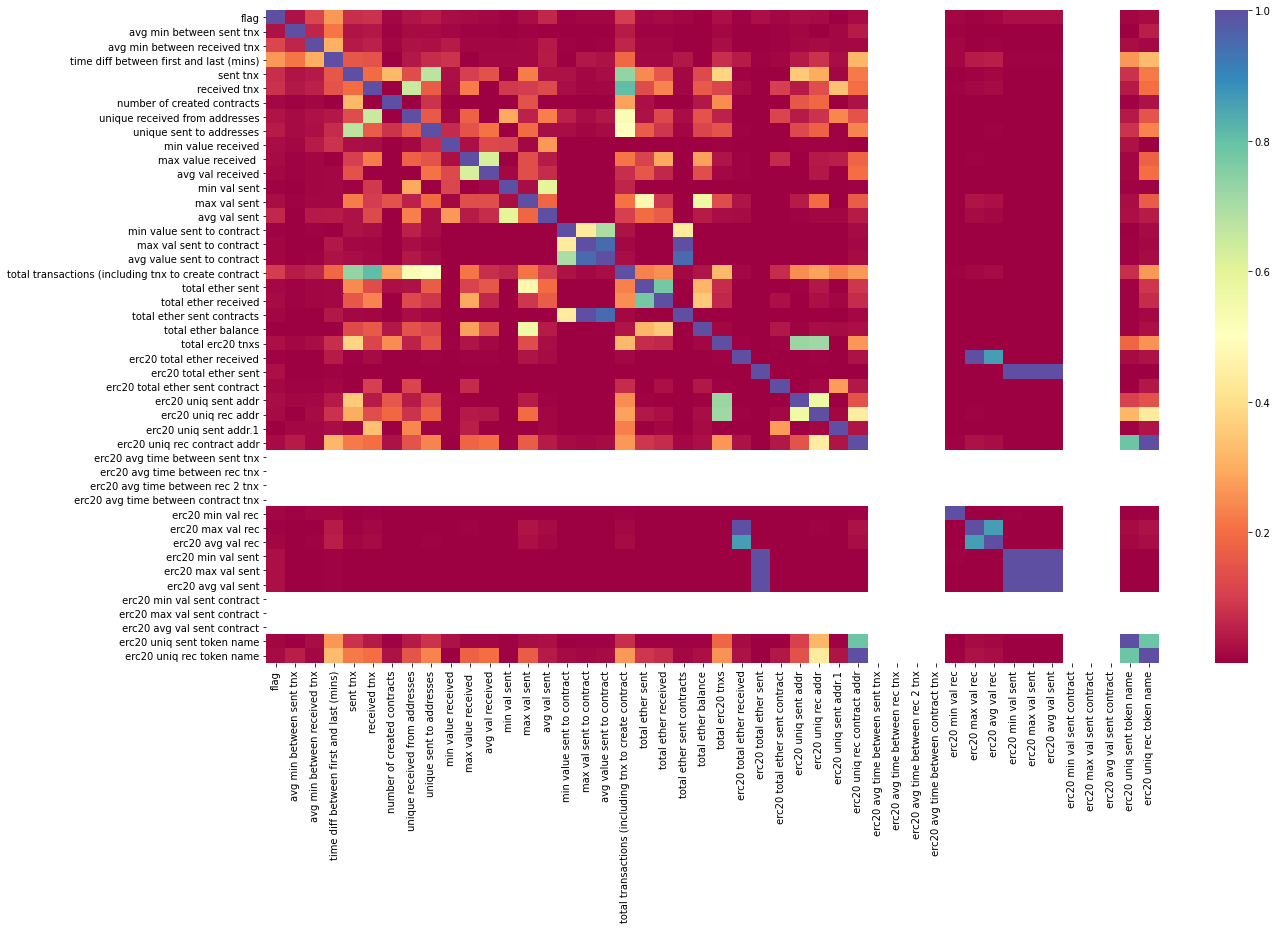

In [148]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(np.abs(corr),cmap='Spectral')
plt.show()

In [149]:
df.columns

Index(['address', 'flag', 'avg min between sent tnx',
       'avg min between received tnx',
       'time diff between first and last (mins)', 'sent tnx', 'received tnx',
       'number of created contracts', 'unique received from addresses',
       'unique sent to addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' total erc20 tnxs', ' erc20 total ether received',
       ' erc20 total ether sent', ' erc20 total ether sent contract',
       ' erc20 uniq sent addr', ' erc20 uniq rec addr',
       ' erc20 uniq sent addr.1', ' erc20 uniq rec contract addr',
       ' erc20 avg time between sent tnx', ' erc20 avg time between rec tn

In [150]:
df.drop(columns=[' erc20 min val sent contract', ' erc20 max val sent contract',
       ' erc20 avg val sent contract',' erc20 avg time between sent tnx', ' erc20 avg time between rec tnx', ' erc20 avg time between contract tnx',
                 ' erc20 avg time between rec 2 tnx'], inplace=True)

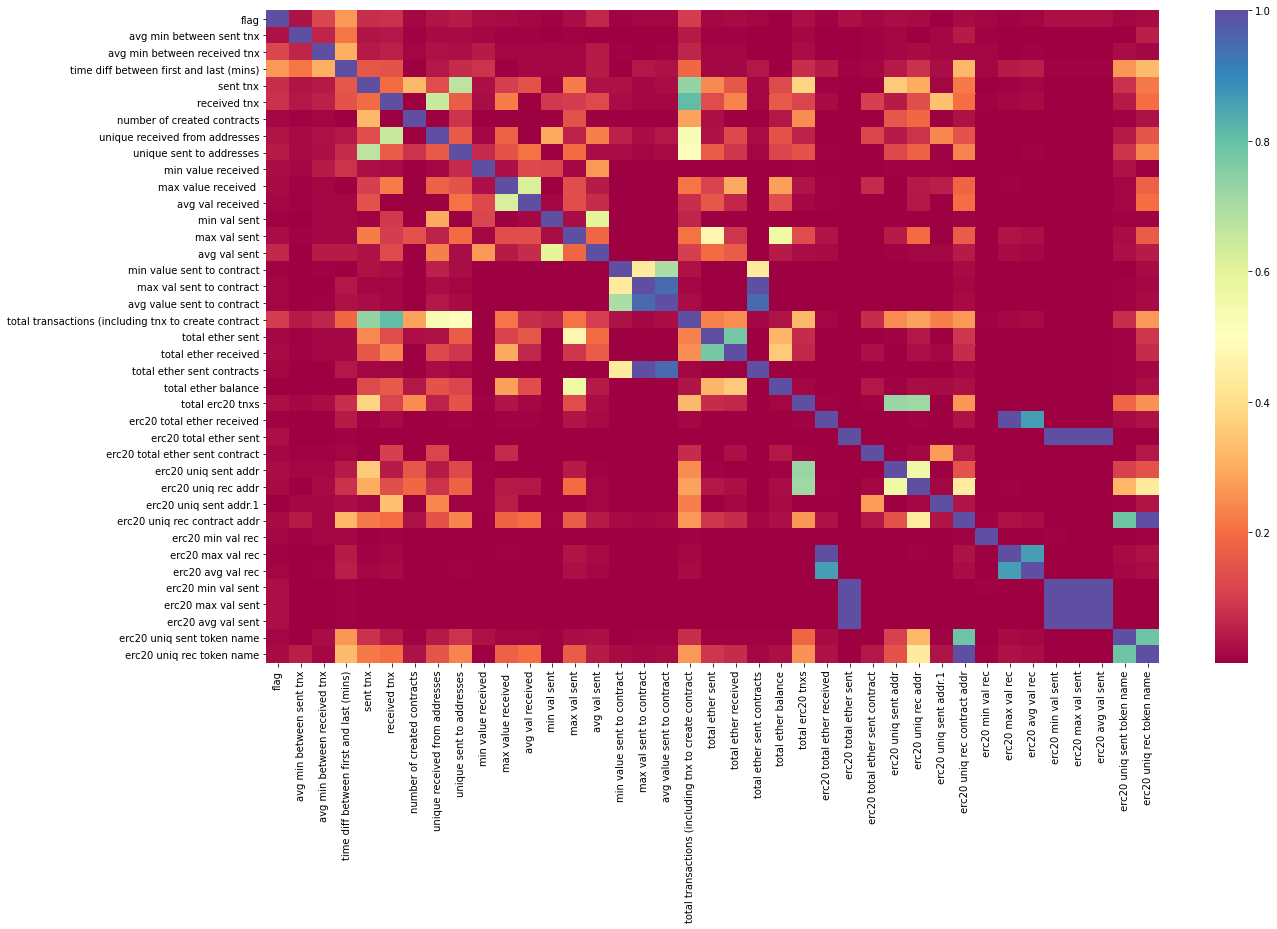

In [151]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(np.abs(corr),cmap='Spectral')
plt.show()

In [152]:
len(df.columns)

40

In [153]:
df.columns

Index(['address', 'flag', 'avg min between sent tnx',
       'avg min between received tnx',
       'time diff between first and last (mins)', 'sent tnx', 'received tnx',
       'number of created contracts', 'unique received from addresses',
       'unique sent to addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' total erc20 tnxs', ' erc20 total ether received',
       ' erc20 total ether sent', ' erc20 total ether sent contract',
       ' erc20 uniq sent addr', ' erc20 uniq rec addr',
       ' erc20 uniq sent addr.1', ' erc20 uniq rec contract addr',
       ' erc20 min val rec', ' erc20 max val rec', ' erc20 avg val rec',
 

In [154]:
features=df.drop(['address', 'flag'],axis=1)

In [155]:
sum(df['flag']==0)/len(df['flag'])*100


77.85794126613149

In [156]:
sum(df['flag']==0)

7662

In [157]:
sum(df['flag']==1)

2179

In [158]:
sum(df['flag']==1)/len(df['flag'])*100

22.14205873386851

In [159]:
#Dataset is imbalanced. So we need to do scaler

In [160]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [161]:
preprocessing_pipeline = Pipeline([('impoter', SimpleImputer(strategy='mean')),
                                   ('scaler', StandardScaler())])

In [162]:
df['flag']=pd.Categorical(df.flag)

In [163]:
df.flag.dtypes


CategoricalDtype(categories=[0, 1], ordered=False)

In [164]:
X = features
y = df['flag']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

X_train = preprocessing_pipeline.fit_transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

In [166]:
print(X_train.shape,y_train.shape)


(6888, 38) (6888,)


In [167]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import Input

In [168]:
inputs = tf.keras.Input(shape=(38,))
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(38,)),
    tf.keras.layers.Flatten(input_shape=(38,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  
])
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 38)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               4992      
_________________________________________________________________
dense_53 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_54 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 65        
Total params: 54,529
Trainable params: 54,529
Non-trainable params: 0
_________________________________________________________________
None


In [169]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [170]:
history=model.fit(X_train, y_train, epochs=50,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/50
54/54 [==============================] - 1s 6ms/step - loss: 0.5509 - accuracy: 0.7480 - val_loss: 0.3507 - val_accuracy: 0.8601
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 0.3228 - accuracy: 0.8522 - val_loss: 0.2679 - val_accuracy: 0.9374
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 0.2539 - accuracy: 0.9176 - val_loss: 0.2136 - val_accuracy: 0.9387
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1944 - accuracy: 0.9411 - val_loss: 0.1863 - val_accuracy: 0.9411
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1800 - accuracy: 0.9355 - val_loss: 0.1729 - val_accuracy: 0.9431
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1594 - accuracy: 0.9432 - val_loss: 0.1710 - val_accuracy: 0.9482
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1384 - accuracy: 0.9487 - val_loss: 0.1379 - val_accuracy: 0.9485
Epoch 8/50
54/54 [==

Text(0.5, 1.0, 'Training and Testing loss')

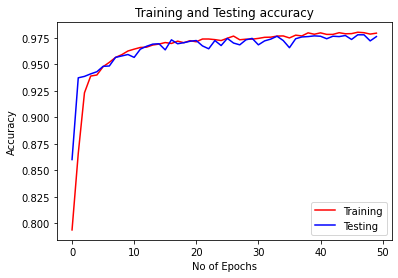

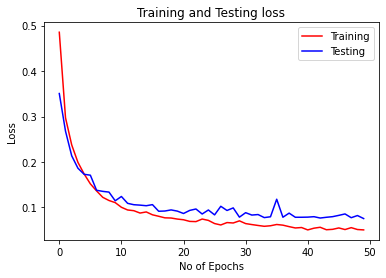

In [171]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r',label='Training')
plt.plot(epochs, val_acc, 'b',label ='Testing')
plt.title('Training and Testing accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'r',label='Training')
plt.plot(epochs, val_loss, 'b',label='Testing')
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Testing loss')
